# Data Analysis on MNIST Dataset

Data Analysis on MNIST Dataset by applying SVM, Logistic regression and Neural Networks.

# 1. Dataset Information

## 1.1 Introduction

The MNIST database (Modified National Institute of Standards and Technology database) is a large database containing handwritten digits. The dataset is commonly used for training various image processing systems as well as training and testing in the field of machine learning. It was created by re-mixing the samples from NIST's original datasets [1].

## 1.2 History

The MNIST database was originated from NIST’s Special Database 3 as training set and Special Database 1 as test set. Those databases also included images of handwritten digits. However, while SD-3 was much cleaner and easy to understand, SD-1 had complex writings. The reason was SD-3 was collected by Census Bureau employees and SD-1 was by high-school students. According to the creators of MNIST dataset this contradiction resulted a need to build a new dataset by mixing the original ones [2].

In the image below you can see one of the samples used in NIST dataset back in 1980's [3].

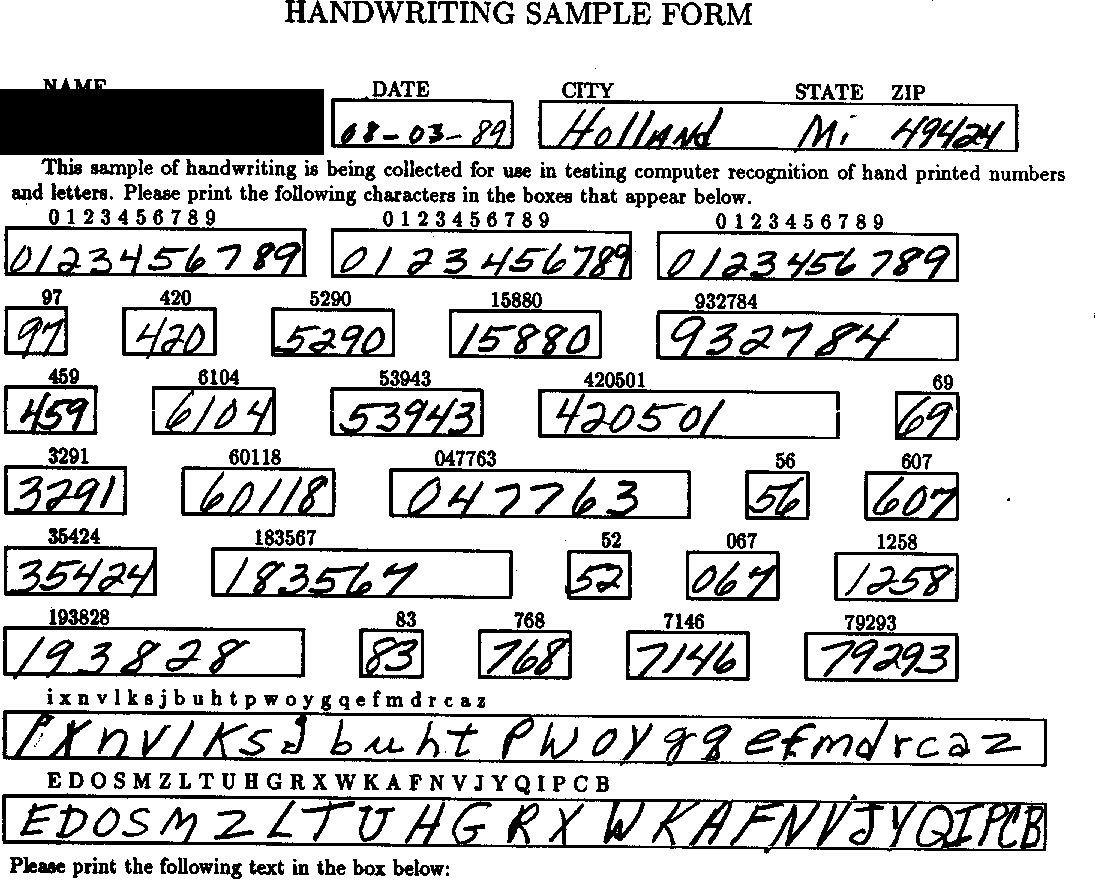

## 1.3 Overview of the Data

The original images from NIST dataset have 20x20 pixels. However, in MNIST the black-white matrix elements were centraled for a 28x28 pixel format. Also, test and trainings datas are combination of SD-1 and SD-3. In SD-1 there were scrambled digit images of 500 different writers. The creators of the MNIST, using the writer identities, gathered the digits in sequence again. Half of the new SD-1 was combined with some portion of SD-3 and together they formed the new training set. Similarly, the other half of Sd-1 was completed with Sd-3 and they became the new test set. Thus, nearly 60,000 test and training datas were reorganized during the establishment of MNIST. Nevertheless, only 10,000 test images(5,000 from SD-1 and 5,000 from SD-3) are available to use, since it is enough when it is compared to 60,000 digits of training set [2].

Now we need to import the MNIST data set. This is how we do it: 

The necessary files are already downloaded. By calling those files, test and training sets are assigned. 

In [9]:
from mlxtend.data import loadlocal_mnist

test_data, test_label = loadlocal_mnist(images_path='C:/Users/azad/Desktop/MNIST/t10k-images.idx3-ubyte', labels_path='C:/Users/azad/Desktop/MNIST/t10k-labels.idx1-ubyte')
train_data, train_label = loadlocal_mnist(images_path='C:/Users/azad/Desktop/MNIST/train-images.idx3-ubyte', labels_path='C:/Users/azad/Desktop/MNIST/train-labels.idx1-ubyte')

Let's check the size of the data. As you can see the train data set is huge while test data set is considerably smaller.

In [7]:
train_data.shape

(60000, 784)

In [8]:
train_label.shape

(60000,)

In [9]:
test_data.shape

(10000, 784)

In [10]:
test_label.shape

(10000,)

However, becase training set is huge it is expensive to work with those datas. Instead, we will use the test images and test label set. We call them as X and Y.

In [11]:
X, Y = loadlocal_mnist(images_path='C:/Users/azad/Desktop/MNIST/t10k-images.idx3-ubyte', labels_path='C:/Users/azad/Desktop/MNIST/t10k-labels.idx1-ubyte')

In [12]:
X.shape

(10000, 784)

In [13]:
Y.shape

(10000,)

It is always fun to visualize and see the physical state of the data. In fact MNIST dataset is a numerical data but with coloring we can see the actual drawing of the integer. Now let's see how a random integer looks like.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from random import randint
rand = randint(0, len(X))

image = X[rand,:]
label = Y[rand]

In [15]:
plottable_image = np.reshape(image, (28, 28))

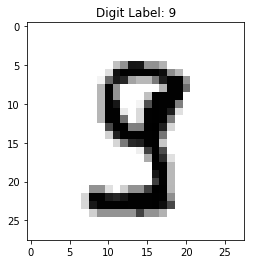

In [16]:
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(label))
plt.show()

# 2. Support Vector Machines

Açıklama

## 2.1 Introduction

Support Vector Machines are supervised learning models for classification problems. The general method is to set a hyperplane between data points which are labeled to different classes. For separable points which are scatered in a space, the method is developed such that a maximum length of margin can be found and placed between the points of different classes. However, a hyperplane may not always separate complex data. In case of a nonlinear separation, a kernel function is used to transform the data to be lienarly separable.

## 2.2 History

The history of Support Vector Machines goes back to 1992 with a paper called "A Training Algorithm for
Optimal Margin Classier" by Bernhard E. Bos, Isabelle M. Guyon and Vladimir N. Vapnik . This was very close to the current form of SVM we use now. In the paper, idea of margins were introduced and the formualas to maximize the margin between datapoints were given with experiments[http://www.svms.org/history.html]. Three years later Corinna Cortes and Vladimir Vapnik came up with "Support-Vector Networks".

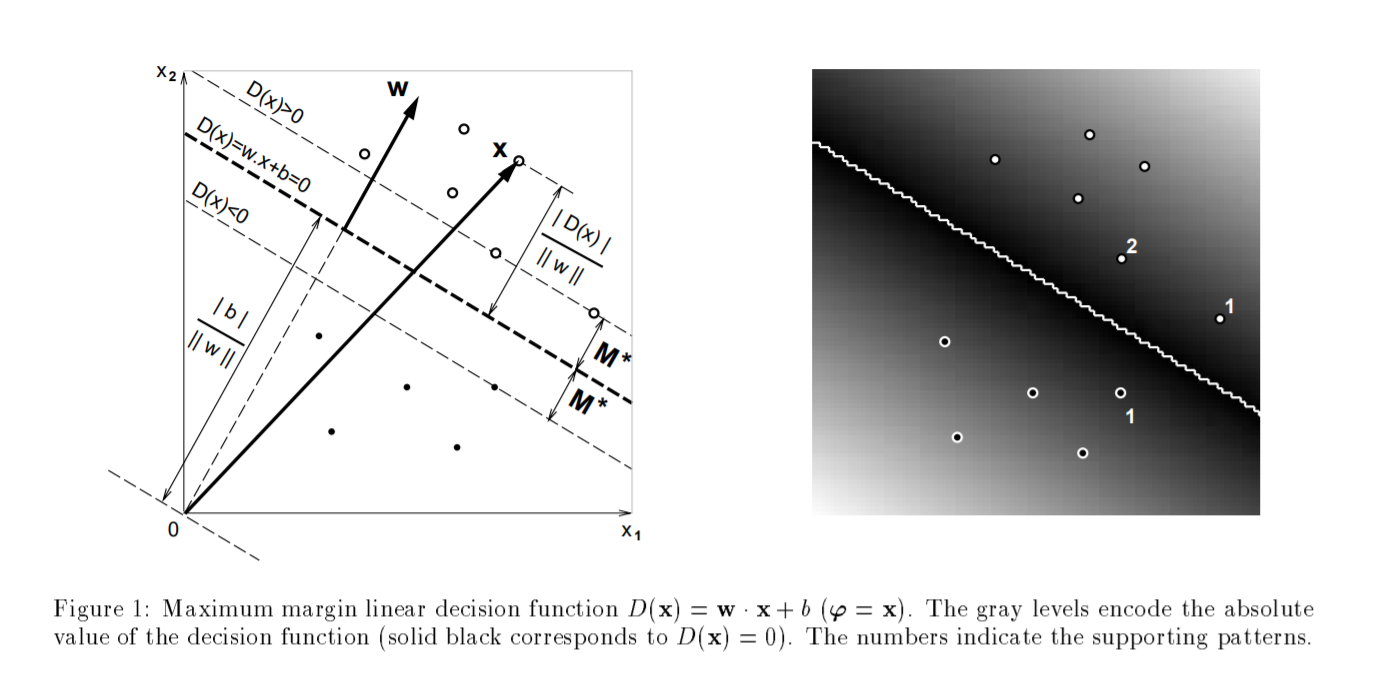

Above you can see a figure from "A Training Algorithm for Optimal Margin Classier" showing the elements of maximum margin linear decision formula with an example data classification next to it [http://www.svms.org/training/BOGV92.pdf]

## 2.3 About the Method

Assume that we have L inputs or data points as x's and labels of two classes that are shown with y's. So we have


\begin{align*}
\{x_i, y_i\} \ where \quad i=1,\ldots, L \quad and \quad y_i\in \{-1,1\},\ x\in\mathbb{R}^D 
\end{align*}

Suppose our data is linearly separable, it means that we can draw a line on graph between $ y_1 $ and $ y_2 $ values. In order to do that we need to have a formula. And that is

\begin{align*}
& w  \cdot x +b = 0 \quad  where \\
& \bullet \ w \ is \ a \ normal \ to \ the \ hyperline, \\
& \bullet \frac{b}{||w||}  \ is \ the \ perpendicular \ distance \ from \ the \ hyperplane \ to \ the \ origin.
\end{align*}

Is w really orthogonal to the hyperline? Take a look at the figure below.

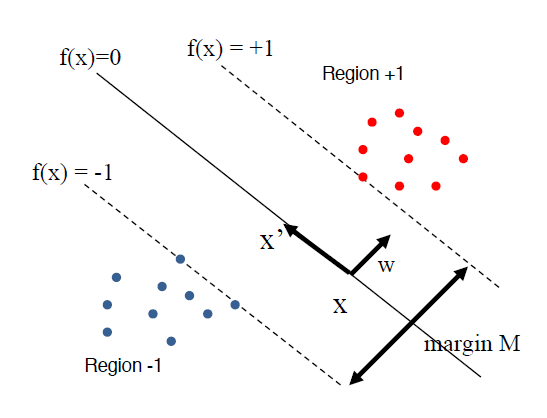

\begin{align*}
w \cdot x +b = 0 \quad and \quad w \cdot x' -b = 0\ \Longrightarrow \ \ w \cdot (x-x') = 0 \\
\end{align*}

[Prof. Alexander Ihler, CS178: Machine Learning and Data Mining Support Vector Machines]

Also, below the points of classes 1 and 2 are linearly separated by a hyperline between the inputs of different classes. The closest points are categorized as $H_1$ and $H_2$. The normal vector and the margins are also shown.

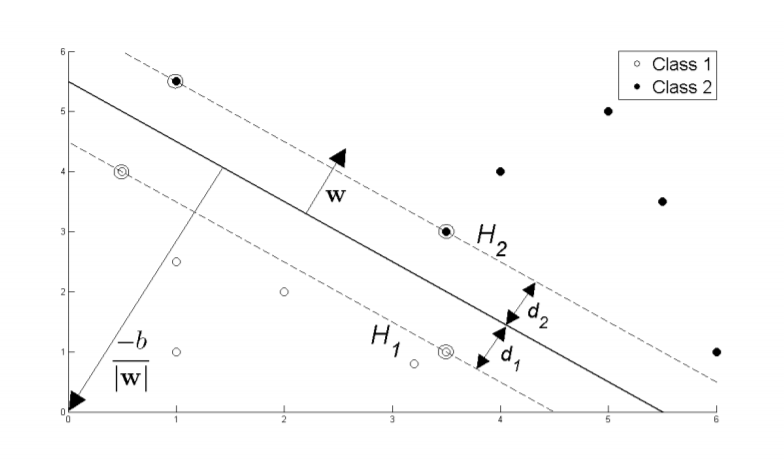

The two closest points which belong to different classes are described with the functions:

\begin{align*}
x_i \cdot w + b = +1 \quad for \quad H_1 \\
x_i \cdot w + b = -1 \quad for \quad H_2 
\end{align*}

The classes are separated as -1 and 1. So a function is needed to decide which points belong to which class. And the function whould produce only -1 and 1.

\begin{align*}
x_i \cdot w +b \geq +1 \quad for \quad y_i  = +1 \\
x_i \cdot w +b \leq -1 \quad for \quad y_i  = -1
\end{align*}

To have the most optimal margin between the closest data points of different classes we need to maximize the margin. If we take margin as $ d_1 $ or $ d_2 $ where $ d_1 = d_2 $ and $ d_1 + d_2 = M $ this leads us to an optimization problem.

Thanks to simple vector geometry the margin is equal to $ \frac{1}{||w||} $. Thus we need to minimize $ ||w|| $ such that  $ \ y_i(x_i \cdot w + b) -1 \geq 0 \ \forall_i $.

Minimizing $ ||w|| $ is equivalent to minimizing $ \frac{1}{2} ||w||^2 $ and this transformation provides the use of Quadratic Programming Optimization. Thus we need to find:
<br>
min $ \frac{1}{2} ||w||^2 $ such that  $ \ y_i(x_i \cdot w + b) -1 \geq 0 \ \ \forall_i $

In order to provide the constraints in this minimization, we need to separate
them with Lagrange multipliers alpha, where $ \alpha_i \geq 0 \ \ \forall i$ .

\begin{align*}
L_P \equiv & \frac{1}{2} ||w||^2 - \alpha [ y_i ( x_i \cdot w + b ) - 1 \ \forall i] \\
\equiv & \frac{1}{2} ||w||^2 - \displaystyle\sum_{i=1}^{L} \alpha_i [ y_i ( x_i \cdot w + b ) - 1] \\
\equiv & \frac{1}{2} ||w||^2 - \displaystyle\sum_{i=1}^{L} \alpha_i y_i( x_i \cdot w + b ) + \displaystyle\sum_{i=1}^{L} \alpha_i 
\end{align*}

differentiating LP with respect to w and b and setting the derivatives to zero:

\begin{align*}
& \frac{\partial L_P}{\partial w} = 0 \implies w = \displaystyle\sum_{i=1}^{L} \alpha_i y_i x_i \\
& \frac{\partial L_P}{\partial b} = 0 \implies \displaystyle\sum_{i=1}^{L} \alpha_i y_i = 0 
\end{align*}

We get a new formulation

\begin{align*}
L_D \equiv & \displaystyle\sum_{i=1}^{L} \alpha_i - \frac{1}{2} \displaystyle\sum_{i,j} \alpha_i \alpha_j y_i y_j x_i \cdot x_j \quad such \ that  \quad   \alpha_i \geq 0 \ \ \forall i , \displaystyle\sum_{i=1}^{L} \alpha_i y_i = 0 \\
\equiv & \displaystyle\sum_{i=1}^{L} \alpha_i - \frac{1}{2} \displaystyle\sum_{i,j} \alpha_i H_{ij} \alpha_j \ \ where  \ \ H_{ij} \equiv y_i y_j x_i \cdot x_j \\
\equiv & \displaystyle\sum_{i=1}^{L}\alpha_i - \frac{1}{2} \alpha^T H \alpha \ \  such that  \ \ \alpha_i \geq \forall i ,  \displaystyle\sum_{i=1}^{L}\alpha_i y_i = 0 
\end{align*}

We need to find

 $ \displaystyle\ max_{\alpha} $

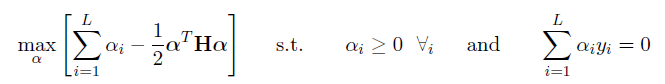

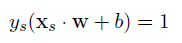

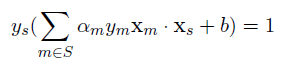

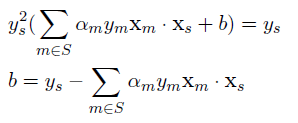

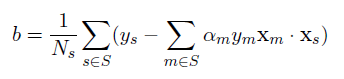

### Mathematical Algorithm

In order to use an SVM to solve a linearly separable, binary classification problem we need to:

Create H where

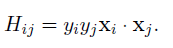

Find alpha such that the following expression is maximized

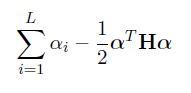

Calculate w which is 

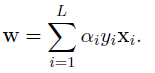

Calculate

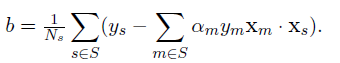

Now, each point x' is classified by valuating 

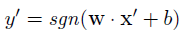

## 2.4 Application on MNIST

Açıklama

In [4]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [5]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

In [6]:
def scale_plot_size(factor):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
import math
import time

## 2.4.1 Linear kernel

Linear SVM performs linear classification. It is simply drawing a line between data points such that
points belonging to opposite classes are separated by that line which is actually a hyperplane.

Also the whole process below is timed to see how long does it take to apply linear SVM on MNIST.

In [17]:
start = time.time()

sum_linear = np.zeros([10,10])
total_test_label = np.zeros((37500))
total_predicted_ys = np.zeros((37500))

for i in range(15):
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
    classifier = svm.SVC(kernel='linear',C=2.0)
    classifier.fit(train_data,train_label)

    predicted_ys = classifier.predict(test_data)
    
    sum_linear = sum_linear + confusion_matrix(test_label, predicted_ys)
    
    
    total_test_label[(i*2500):((i+1)*2500)] = test_label
    total_predicted_ys[(i*2500):((i+1)*2500)] = predicted_ys
    
end = time.time()
time_linear = end - start
print(time_linear)

240.8634614944458


For the classification report those fifteen iteration of classifications and predictions are combined. The algorithm
have processed total of 37,500 digits.

In [18]:
print(classification_report(total_test_label, total_predicted_ys))

             precision    recall  f1-score   support

        0.0       0.95      0.98      0.96      3613
        1.0       0.95      0.99      0.97      4193
        2.0       0.90      0.93      0.91      3932
        3.0       0.89      0.91      0.90      3733
        4.0       0.90      0.93      0.92      3647
        5.0       0.89      0.86      0.87      3381
        6.0       0.96      0.94      0.95      3639
        7.0       0.93      0.91      0.92      3829
        8.0       0.93      0.87      0.90      3705
        9.0       0.91      0.88      0.89      3828

avg / total       0.92      0.92      0.92     37500



Indeed, it is possible for the algorithm to never encounter an integer predicted as another one. So during the preparation of the codes sometimes, not often, I encountered NaN values in a few cells of the confusion matrix. Obviously this ruins the further calculation codes and visualizations. In order to get rid of this, the codes below checks every element of the matrix and if finds a NaN value, converts it into a zero.

In [19]:
def nan_to_zero(matrix):
    for i in range(10):
        for j in range(10):
            if math.isnan(matrix[i,j]) == True:
                matrix[i,j] = 0

Displaying matrices, in which we usually get float values, it is crucial to understand the elements perfectly. That is why all values are restricted up to 3 decimals by the code below. This convertion is needed, otherwise confusion matrices look complex and therefore hard to understand.

In [20]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

avg_lineer = np.arange(0,27,3).reshape(3,3).astype(np.float64)

Let's see what the average result is

In [21]:
avg_linear = sum_linear/15.0
avg_linear = np.around(avg_linear,3)
print(avg_linear)

[[235.133 0.000 0.333 0.667 0.200 1.533 1.933 0.400 0.667 0.000]
 [0.000 276.133 0.600 0.667 0.133 1.000 0.333 0.067 0.533 0.067]
 [2.133 3.000 243.333 2.133 3.000 0.800 1.733 2.267 3.000 0.733]
 [0.600 0.733 4.867 227.200 0.333 7.200 0.200 2.200 4.333 1.200]
 [0.333 0.200 2.800 0.267 227.133 0.400 1.400 1.067 0.867 8.667]
 [3.067 2.267 3.267 10.067 2.667 193.667 3.000 0.733 4.267 2.400]
 [2.067 0.667 3.933 0.133 2.400 3.533 229.000 0.267 0.600 0.000]
 [1.000 3.133 5.533 1.533 2.667 0.200 0.133 233.533 0.333 7.200]
 [1.133 4.000 4.533 8.200 1.533 8.000 1.533 1.333 214.267 2.467]
 [1.267 1.200 1.333 3.000 11.467 2.133 0.267 9.133 1.800 223.600]]


Normalizing the matrix allows us to see the percentages of the predictions, rather than counted values.

In [22]:
normalized_linear = normalize(avg_linear, axis=1, norm='l1')
print(normalized_linear)

[[0.976 0.000 0.001 0.003 0.001 0.006 0.008 0.002 0.003 0.000]
 [0.000 0.988 0.002 0.002 0.000 0.004 0.001 0.000 0.002 0.000]
 [0.008 0.011 0.928 0.008 0.011 0.003 0.007 0.009 0.011 0.003]
 [0.002 0.003 0.020 0.913 0.001 0.029 0.001 0.009 0.017 0.005]
 [0.001 0.001 0.012 0.001 0.934 0.002 0.006 0.004 0.004 0.036]
 [0.014 0.010 0.014 0.045 0.012 0.859 0.013 0.003 0.019 0.011]
 [0.009 0.003 0.016 0.001 0.010 0.015 0.944 0.001 0.002 0.000]
 [0.004 0.012 0.022 0.006 0.010 0.001 0.001 0.915 0.001 0.028]
 [0.005 0.016 0.018 0.033 0.006 0.032 0.006 0.005 0.867 0.010]
 [0.005 0.005 0.005 0.012 0.045 0.008 0.001 0.036 0.007 0.876]]


Integers are stored in a 1-dimensional matrix. We will need this to plot the confusion matrices.

In [23]:
int = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

Visualizing the percentages of how many times an integer is guessed correctly. This is a colorful way to see things better.

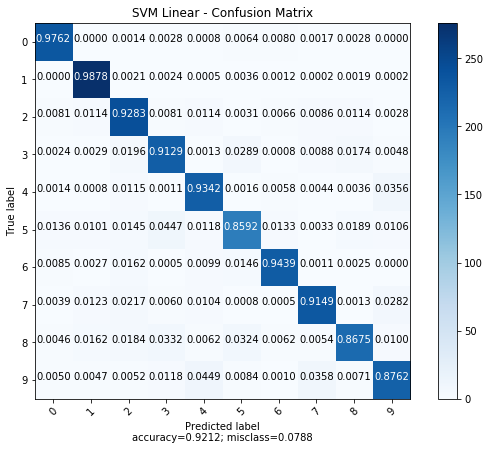

In [28]:
plot_confusion_matrix(avg_linear, 
                      normalize    = True,
                      target_names = int,
                      title        = "SVM Linear - Confusion Matrix")

To see the percentage of the correctly predicted integer in a cleaner way, this is a simple function which stores the diagonal elements of the normalized matrix we just achieved and creates a new one dimensional array. So for each integer we can see the probability.

In [29]:
def int_probability(norm_matrix):
    diagonal = np.zeros((10))
    sum = 0.0
    for i in range(10):
        for j in range(10):
            if (i==j):
                diagonal[i] = norm_matrix[i,j]
    return(diagonal)

Printing them next to each real integer values they belong:

In [30]:
prob_linear = int_probability(normalized_linear)    

for i in range(10):
    print(i, end=" => ") 
    print(prob_linear[i])

0 => 0.9761983841638089
1 => 0.9878368564713288
2 => 0.9282842232157844
3 => 0.9129411008333803
4 => 0.9341885544596806
5 => 0.859207105527014
6 => 0.9439406430338005
7 => 0.914864944273598
8 => 0.8674812448633396
9 => 0.8761755485893417


Below you see a function which basically finds the top 3 misidentification made by the algorithm. Checking every bit of the matrix and putting the diagonal ones aside, it finds the maximum values and prints these in a readable way.

In [31]:
maximum_misidentification(normalized_linear)

Apart from the diagonal elements of the confusion matrix:
While predicting the integer 9 , 4.493 % of the times the algorithm misidentified it as 4 and
while predicting the integer 5 , 4.466 % of the times the algorithm misidentified it as 3 and
while predicting the integer 4 , 3.565 % of the times the algorithm misidentified it as 9 .


## 2.4.3 Polynomial kernel

Every classification problem may not be solved by a linear hyperplane. In such cases applying
polynomial kernel can be very useful. Choosing the degree, it is possible to separate data points by a
polynom where a line cannot be perfectly placed between opposite ones.

### 2.4.3.1 Polynomial kernel with degree 3

In this example we chose the degree as 3 and C value as 2.

In [32]:
start = time.time()

sum_poly_d3 = np.zeros((10,10))
total_test_label = np.zeros((37500))
total_predicted_ys = np.zeros((37500))

for i in range(15):
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
    classifier = svm.SVC(kernel='poly',C=2.0, degree = 3)
    classifier.fit(train_data,train_label)

    predicted_ys = classifier.predict(test_data)
    sum_poly_d3 = sum_poly_d3 + confusion_matrix(test_label,predicted_ys)
      
    total_test_label[(i*2500):((i+1)*2500)] = test_label
    total_predicted_ys[(i*2500):((i+1)*2500)] = predicted_ys
    
end = time.time()
time_poly_d3 = end - start
print(time_poly_d3)

282.68076848983765


Classification report of the polynomial kernel:

In [33]:
print(classification_report(total_test_label, total_predicted_ys))

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97      3696
        1.0       0.95      0.99      0.97      4228
        2.0       0.96      0.95      0.95      3834
        3.0       0.94      0.94      0.94      3723
        4.0       0.96      0.96      0.96      3677
        5.0       0.95      0.93      0.94      3466
        6.0       0.96      0.97      0.96      3689
        7.0       0.95      0.95      0.95      3844
        8.0       0.96      0.93      0.94      3618
        9.0       0.95      0.94      0.94      3725

avg / total       0.95      0.95      0.95     37500



The average confussion matrix is shown below:

In [34]:
avg_poly_d3 = sum_poly_d3/15

print(avg_poly_d3)

[[240.933 0.133 0.267 0.267 0.000 1.933 2.067 0.333 0.467 0.000]
 [0.000 278.467 0.467 0.533 0.000 0.200 0.733 0.467 1.000 0.000]
 [2.267 2.200 242.400 1.333 0.867 0.333 1.333 3.133 1.133 0.600]
 [0.533 1.933 2.667 234.000 0.200 2.800 0.000 1.800 2.667 1.600]
 [0.200 0.733 0.800 0.067 236.000 0.200 1.467 0.800 0.733 4.133]
 [1.533 1.867 0.600 5.133 0.933 215.067 3.000 0.133 1.600 1.200]
 [1.200 1.867 0.867 0.133 0.800 1.867 237.800 0.400 0.733 0.267]
 [0.533 3.733 2.267 0.467 0.800 0.267 0.267 244.667 0.400 2.867]
 [1.333 0.933 2.000 5.200 1.267 3.000 0.467 1.867 223.867 1.267]
 [2.067 1.600 1.000 0.733 5.200 0.267 0.067 3.000 1.800 232.600]]


Let's get it normalized.

In [35]:
normalized_poly_d3 = normalize(avg_poly_d3, axis=1, norm='l1')
print(normalized_poly_d3)

[[0.978 0.001 0.001 0.001 0.000 0.008 0.008 0.001 0.002 0.000]
 [0.000 0.988 0.002 0.002 0.000 0.001 0.003 0.002 0.004 0.000]
 [0.009 0.009 0.948 0.005 0.003 0.001 0.005 0.012 0.004 0.002]
 [0.002 0.008 0.011 0.943 0.001 0.011 0.000 0.007 0.011 0.006]
 [0.001 0.003 0.003 0.000 0.963 0.001 0.006 0.003 0.003 0.017]
 [0.007 0.008 0.003 0.022 0.004 0.931 0.013 0.001 0.007 0.005]
 [0.005 0.008 0.004 0.001 0.003 0.008 0.967 0.002 0.003 0.001]
 [0.002 0.015 0.009 0.002 0.003 0.001 0.001 0.955 0.002 0.011]
 [0.006 0.004 0.008 0.022 0.005 0.012 0.002 0.008 0.928 0.005]
 [0.008 0.006 0.004 0.003 0.021 0.001 0.000 0.012 0.007 0.937]]


The prediction ratios of the digits:

In [36]:
prob_poly_d3 = int_probability(normalized_poly_d3)    

for i in range(10):
    print(i, end=" => ") 
    print(prob_poly_d3[i])      

0 => 0.9778138528138528
1 => 0.9879375591296122
2 => 0.9483568075117371
3 => 0.9427880741337631
4 => 0.962741365243405
5 => 0.9307559145989615
6 => 0.9669287069666577
7 => 0.9547346514047867
8 => 0.9281370923161968
9 => 0.9366442953020134


In [37]:
maximum_misidentification(normalized_poly_d3)

Apart from the diagonal elements of the confusion matrix:
While predicting the integer 5 , 2.222 % of the times the algorithm misidentified it as 3 and
while predicting the integer 9 , 2.094 % of the times the algorithm misidentified it as 4 and
while predicting the integer 4 , 1.686 % of the times the algorithm misidentified it as 9 .


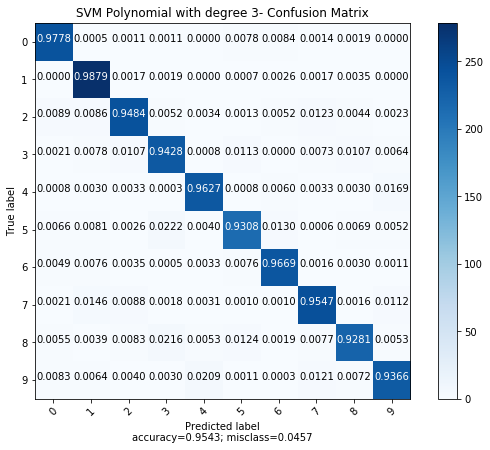

In [38]:
plot_confusion_matrix(avg_poly_d3, 
                      normalize    = True,
                      target_names = int,
                      title        = "SVM Polynomial with degree 3- Confusion Matrix")

### 2.4.3.2 Polynomial kernel with degree 2

Compared to the previous one nothing is changed in the codes except the degree which is set to 2 here. The C value is again 2.

In [39]:
start = time.time()

sum_poly_d2 = np.zeros((10,10))
total_test_label = np.zeros((37500))
total_predicted_ys = np.zeros((37500))

for i in range(15):
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
    classifier = svm.SVC(kernel='poly',C=2.0, degree = 2)
    classifier.fit(train_data,train_label)

    predicted_ys = classifier.predict(test_data)
    sum_poly_d2 = sum_poly_d2 + confusion_matrix(test_label,predicted_ys)
      
    total_test_label[(i*2500):((i+1)*2500)] = test_label
    total_predicted_ys[(i*2500):((i+1)*2500)] = predicted_ys
    
end = time.time()
time_poly_d2 = end - start
print(time_poly_d2)

260.602685213089


In [40]:
print(classification_report(total_test_label, total_predicted_ys))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      3674
        1.0       0.97      0.99      0.98      4276
        2.0       0.97      0.96      0.96      3931
        3.0       0.95      0.95      0.95      3734
        4.0       0.96      0.97      0.97      3718
        5.0       0.95      0.95      0.95      3303
        6.0       0.97      0.97      0.97      3588
        7.0       0.96      0.96      0.96      3823
        8.0       0.97      0.94      0.96      3604
        9.0       0.96      0.94      0.95      3849

avg / total       0.96      0.96      0.96     37500



In [41]:
avg_poly_d2 = sum_poly_d2/15

print(avg_poly_d2)

[[241.733 0.067 0.000 0.267 0.000 1.067 1.267 0.067 0.400 0.067]
 [0.000 282.200 0.133 0.467 0.067 0.333 0.733 0.533 0.600 0.000]
 [1.333 1.000 251.000 2.267 1.133 0.333 1.067 2.667 0.800 0.467]
 [0.000 0.600 1.800 236.800 0.200 3.867 0.000 1.800 2.267 1.600]
 [0.533 0.067 0.600 0.067 240.800 0.133 0.533 0.667 0.733 3.733]
 [1.333 0.800 0.467 4.000 0.600 208.600 2.200 0.067 1.200 0.933]
 [1.733 0.800 0.400 0.133 1.000 1.333 232.933 0.267 0.467 0.133]
 [0.133 3.267 1.867 0.333 1.133 0.133 0.067 244.867 0.267 2.800]
 [0.600 0.600 2.067 3.067 1.133 3.533 0.467 1.133 226.600 1.067]
 [1.400 1.267 0.867 1.667 4.333 0.400 0.267 3.800 0.667 241.933]]


In [42]:
normalized_poly_d2 = normalize(avg_poly_d2, axis=1, norm='l1')
print(normalized_poly_d2)

[[0.987 0.000 0.000 0.001 0.000 0.004 0.005 0.000 0.002 0.000]
 [0.000 0.990 0.000 0.002 0.000 0.001 0.003 0.002 0.002 0.000]
 [0.005 0.004 0.958 0.009 0.004 0.001 0.004 0.010 0.003 0.002]
 [0.000 0.002 0.007 0.951 0.001 0.016 0.000 0.007 0.009 0.006]
 [0.002 0.000 0.002 0.000 0.971 0.001 0.002 0.003 0.003 0.015]
 [0.006 0.004 0.002 0.018 0.003 0.947 0.010 0.000 0.005 0.004]
 [0.007 0.003 0.002 0.001 0.004 0.006 0.974 0.001 0.002 0.001]
 [0.001 0.013 0.007 0.001 0.004 0.001 0.000 0.961 0.001 0.011]
 [0.002 0.002 0.009 0.013 0.005 0.015 0.002 0.005 0.943 0.004]
 [0.005 0.005 0.003 0.006 0.017 0.002 0.001 0.015 0.003 0.943]]


In [43]:
prob_poly_d2 = int_probability(normalized_poly_d2)    

for i in range(10):
    print(i, end=" => ") 
    print(prob_poly_d2[i])

0 => 0.9869352204681545
1 => 0.9899438727782972
2 => 0.9577715593996439
3 => 0.9512587038028922
4 => 0.9714900484131255
5 => 0.9473206176203451
6 => 0.9738015607580824
7 => 0.9607637980643473
8 => 0.943118756936737
9 => 0.9428422967004416


In [44]:
maximum_misidentification(normalized_poly_d2)

Apart from the diagonal elements of the confusion matrix:
While predicting the integer 5 , 1.817 % of the times the algorithm misidentified it as 3 and
while predicting the integer 9 , 1.689 % of the times the algorithm misidentified it as 4 and
while predicting the integer 3 , 1.553 % of the times the algorithm misidentified it as 5 .


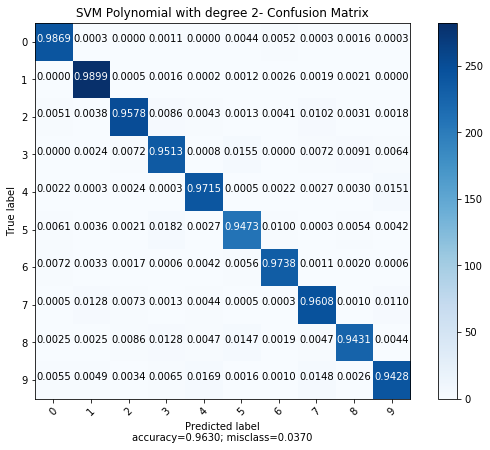

In [45]:
plot_confusion_matrix(avg_poly_d2, 
                      normalize    = True,
                      target_names = int,
                      title        = "SVM Polynomial with degree 2- Confusion Matrix")

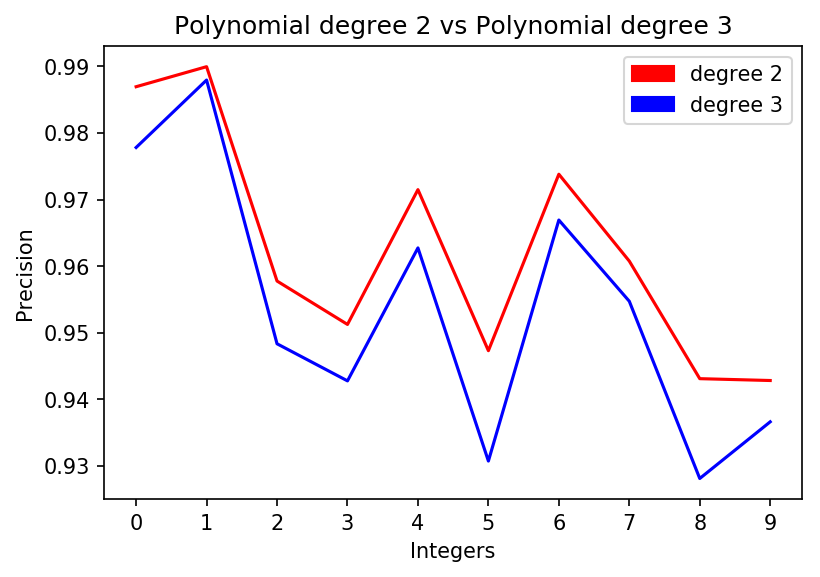

In [47]:
plt.plot(int, prob_poly_d2, color='red')
plt.plot(int, prob_poly_d3, color='blue')
plt.xlabel('Integers')
plt.ylabel('Precision')
plt.title('Polynomial degree 2 vs Polynomial degree 3')
scale_plot_size(1.5)

green_line = mpatches.Patch(color='red', label='degree 2')
orange_line = mpatches.Patch(color='blue', label='degree 3')

plt.legend(handles=[green_line, orange_line])


plt.show()

## 2.4.4 Other kernels

As you can see below both Sigmoid and RBF kernels do not properly work for MNIST dataset. So these functions don't help us classify the digits.

### 2.4.4.1 Sigmoid Kernel

In [43]:
train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)

classifier = svm.SVC(kernel='sigmoid', gamma = 2)
classifier.fit(train_data, train_label)

predicted_ys = classifier.predict(test_data)
confusion_matrix(test_label,predicted_ys)

array([[  0, 256,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 260,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 274,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 220,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 244,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 253,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 246,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 239,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 249,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 259,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

### 2.4.4.2 RBF

In [46]:
train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
classifier = svm.SVC(kernel='rbf', gamma = 1.0 )
classifier.fit(train_data,train_label)

predicted_ys = classifier.predict(test_data)
confusion_matrix(test_label,predicted_ys)    

array([[  0, 264,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 279,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 262,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 238,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 243,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 233,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 243,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 239,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 244,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

# 3. Logistic Regression

## 3.1 Introduction

Logistic Regression is a model that uses logistic(or logit) function and works on binary dependent variables.  A linear model for only two y values would probably not give us the best results. However, a regression line, not linear but logistic, helps us predicting the probabilites of a possible outcome.

## 3.2 History

The logistic function was invented in the 19th century for the description of the growth of populations and the course of autocatalytic chemical reactions. Belgian astronomer Alphonso Quetelet and his student Pierre-François Verhulst had dealt with the problem and came up with the logistic function, which was named by Verhulst:

$ P(t) = \frac{exp(\alpha + \beta t)}{1 + exp(\alpha + \beta t)} $ [4]

where $ P(t) = W(t)/\Omega $ , W(t) is time of path, $ \beta = W'(t)/W(t) $, and $ W'(t) = \beta W(t)(\Omega-W(t)) $ and Omega is a coefficient.

Later, between 1838 and 1847 Verhulst did several corrections on the function, especially on Omega. In his paper, Verhulst practiced the function with the populations of Belgium and France, and made predictions. He believed that the population growth was best modelled by an exponential function.

Many years later, in 1920, Raymond Pearl and Lowell J. Reed discovered the logistic function. They were unaware of Verhulst’s papers first. In a 1922 paper, Verhulst was mentioned by Pearl and Reed for the first time. The old terminology was not used in the new article.  The name “logistic” was adopted again by Udny Yules’s publication in 1925.

In the following years it was approved that the logistic function would also work in wider statistical applications such as discriminant analysis, loglinear models, case-control studies and so on. The term “logistic regression” was introduced by the mathematician David Cox in his 1958 paper “Regression Analysis of Binary Sequences”. 

First page and a glance of the Cox’s paper:

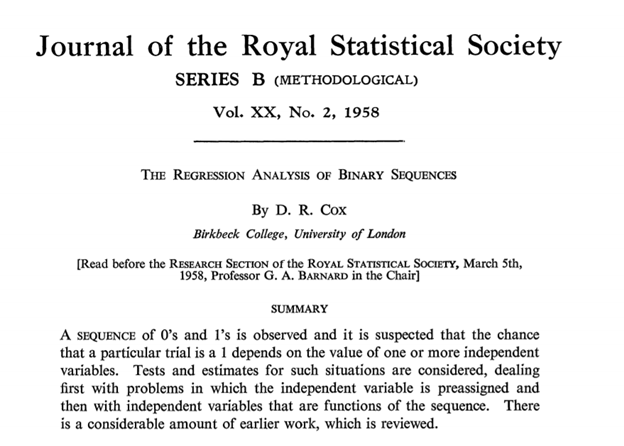

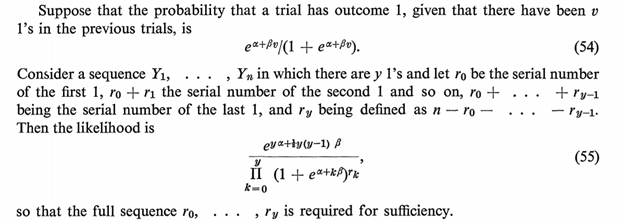

## 3.3 About the Method

Açıklama

$ l = logit(p) = ln(p/(1-p)) $

$ p = logistic(l) = e’/(1+e’) $

## 3.4 Application on MNIST

Açıklama

In [48]:
logisticRegr = LogisticRegression()

In [49]:
start = time.time()

sum_log_res = np.zeros((10,10))
total_test_label = np.zeros((37500))
total_predicted_ys = np.zeros((37500))

classifier = LogisticRegression()

for i in range(15):
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
    classifier.fit(train_data, train_label)
    
    predicted_ys = classifier.predict(test_data)
    sum_log_res = sum_log_res + confusion_matrix(test_label,predicted_ys)
      
    total_test_label[(i*2500):((i+1)*2500)] = test_label
    total_predicted_ys[(i*2500):((i+1)*2500)] = predicted_ys
    
end = time.time()
time_logres = end - start
print(time_logres)

1896.0518398284912


In [50]:
print(classification_report(total_test_label, total_predicted_ys))

             precision    recall  f1-score   support

        0.0       0.93      0.91      0.92      3643
        1.0       0.96      0.94      0.95      4088
        2.0       0.81      0.82      0.81      3894
        3.0       0.80      0.79      0.80      3828
        4.0       0.90      0.88      0.89      3767
        5.0       0.74      0.74      0.74      3321
        6.0       0.92      0.89      0.90      3630
        7.0       0.90      0.87      0.88      3903
        8.0       0.67      0.79      0.73      3645
        9.0       0.84      0.81      0.83      3781

avg / total       0.85      0.85      0.85     37500



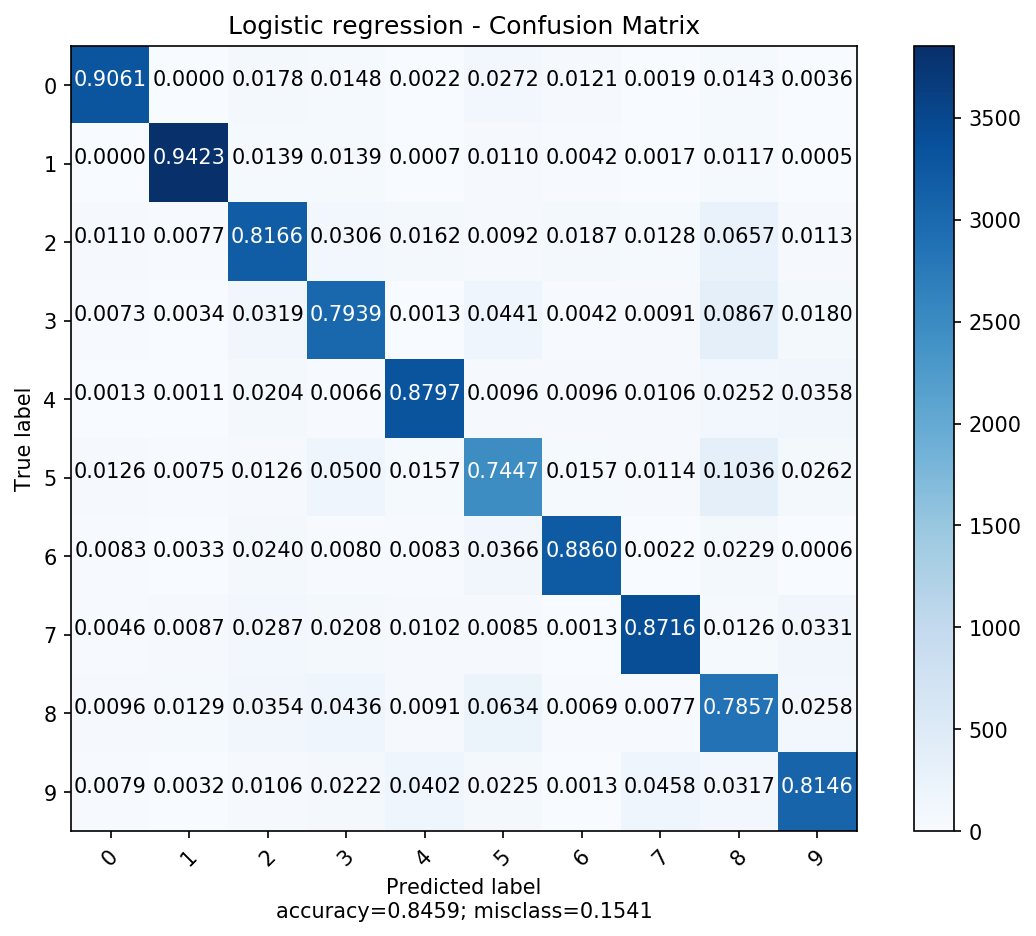

In [51]:
plot_confusion_matrix(sum_log_res, 
                      normalize    = True,
                      target_names = int,
                      title        = "Logistic regression - Confusion Matrix")

In [52]:
print(sum_log_res)

[[3301.000 0.000 65.000 54.000 8.000 99.000 44.000 7.000 52.000 13.000]
 [0.000 3852.000 57.000 57.000 3.000 45.000 17.000 7.000 48.000 2.000]
 [43.000 30.000 3180.000 119.000 63.000 36.000 73.000 50.000 256.000
  44.000]
 [28.000 13.000 122.000 3039.000 5.000 169.000 16.000 35.000 332.000
  69.000]
 [5.000 4.000 77.000 25.000 3314.000 36.000 36.000 40.000 95.000 135.000]
 [42.000 25.000 42.000 166.000 52.000 2473.000 52.000 38.000 344.000
  87.000]
 [30.000 12.000 87.000 29.000 30.000 133.000 3216.000 8.000 83.000 2.000]
 [18.000 34.000 112.000 81.000 40.000 33.000 5.000 3402.000 49.000
  129.000]
 [35.000 47.000 129.000 159.000 33.000 231.000 25.000 28.000 2864.000
  94.000]
 [30.000 12.000 40.000 84.000 152.000 85.000 5.000 173.000 120.000
  3080.000]]


In [53]:
sum_log_res = np.around(sum_log_res)
avg_log_res = sum_log_res/15
print(avg_log_res)

[[220.067 0.000 4.333 3.600 0.533 6.600 2.933 0.467 3.467 0.867]
 [0.000 256.800 3.800 3.800 0.200 3.000 1.133 0.467 3.200 0.133]
 [2.867 2.000 212.000 7.933 4.200 2.400 4.867 3.333 17.067 2.933]
 [1.867 0.867 8.133 202.600 0.333 11.267 1.067 2.333 22.133 4.600]
 [0.333 0.267 5.133 1.667 220.933 2.400 2.400 2.667 6.333 9.000]
 [2.800 1.667 2.800 11.067 3.467 164.867 3.467 2.533 22.933 5.800]
 [2.000 0.800 5.800 1.933 2.000 8.867 214.400 0.533 5.533 0.133]
 [1.200 2.267 7.467 5.400 2.667 2.200 0.333 226.800 3.267 8.600]
 [2.333 3.133 8.600 10.600 2.200 15.400 1.667 1.867 190.933 6.267]
 [2.000 0.800 2.667 5.600 10.133 5.667 0.333 11.533 8.000 205.333]]


In [54]:
normalized_log_res = normalize(avg_log_res, axis=1, norm='l1')
normalized_log_res = np.around(normalized_log_res,3)
print(normalized_log_res)

[[0.906 0.000 0.018 0.015 0.002 0.027 0.012 0.002 0.014 0.004]
 [0.000 0.942 0.014 0.014 0.001 0.011 0.004 0.002 0.012 0.000]
 [0.011 0.008 0.817 0.031 0.016 0.009 0.019 0.013 0.066 0.011]
 [0.007 0.003 0.032 0.794 0.001 0.044 0.004 0.009 0.087 0.018]
 [0.001 0.001 0.020 0.007 0.880 0.010 0.010 0.011 0.025 0.036]
 [0.013 0.008 0.013 0.050 0.016 0.745 0.016 0.011 0.104 0.026]
 [0.008 0.003 0.024 0.008 0.008 0.037 0.886 0.002 0.023 0.001]
 [0.005 0.009 0.029 0.021 0.010 0.008 0.001 0.872 0.013 0.033]
 [0.010 0.013 0.035 0.044 0.009 0.063 0.007 0.008 0.786 0.026]
 [0.008 0.003 0.011 0.022 0.040 0.022 0.001 0.046 0.032 0.815]]


In [55]:
prob_log_res = int_probability(normalized_log_res)    

for i in range(10):
    print(i, end=" => ") 
    print(prob_log_res[i])   

0 => 0.906
1 => 0.942
2 => 0.817
3 => 0.794
4 => 0.88
5 => 0.745
6 => 0.886
7 => 0.872
8 => 0.786
9 => 0.815


In [56]:
maximum_misidentification(normalized_log_res)

Apart from the diagonal elements of the confusion matrix:
While predicting the integer 5 , 10.4 % of the times the algorithm misidentified it as 8 and
while predicting the integer 8 , 6.3 % of the times the algorithm misidentified it as 5 and
while predicting the integer 9 , 4.6 % of the times the algorithm misidentified it as 7 .


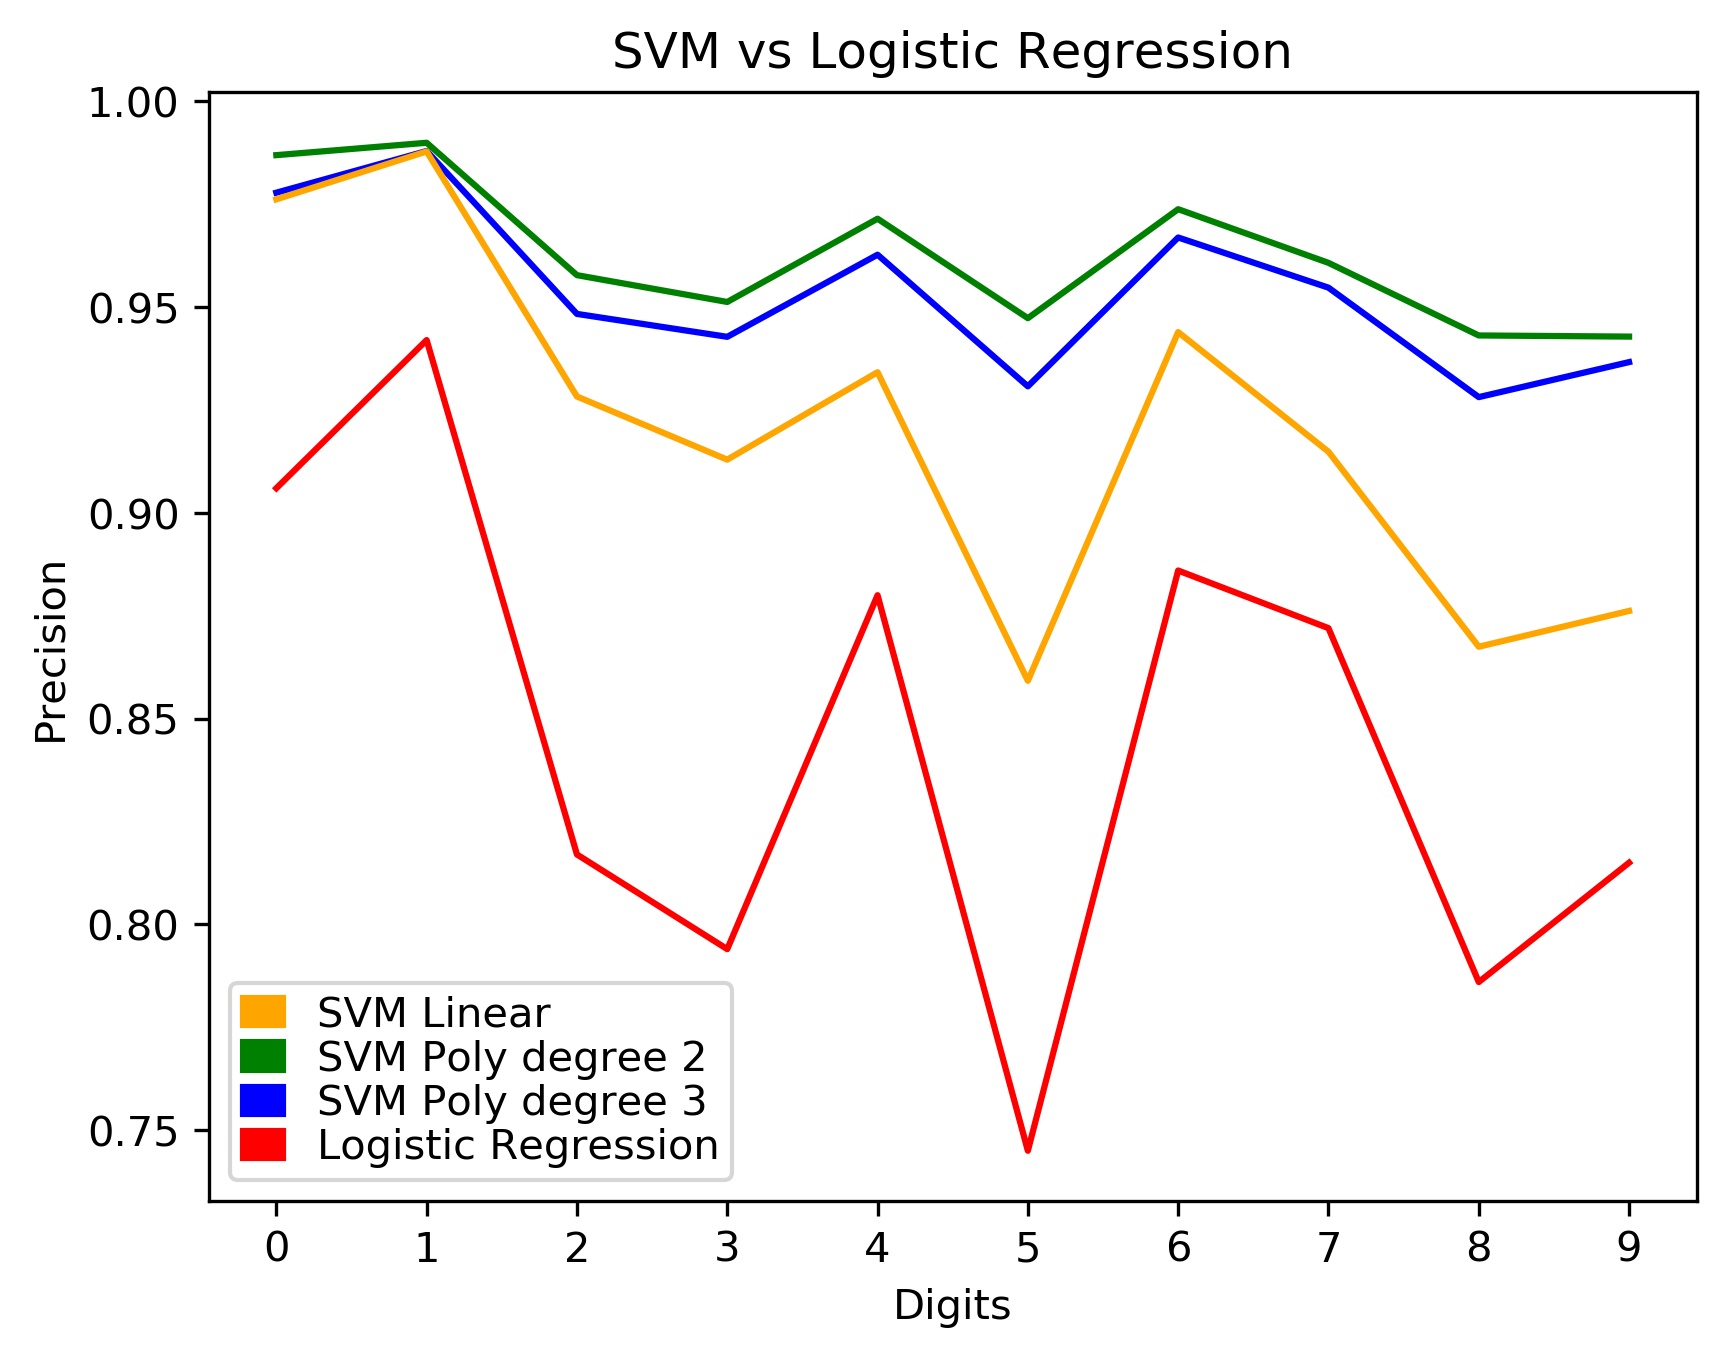

In [139]:
prob_log_res = np.round(prob_log_res,3)

plt.plot(int, prob_poly_d3, color='blue')
plt.plot(int, prob_poly_d2, color='g')
plt.plot(int, prob_linear, color='orange')
plt.plot(int, prob_log_res, color = 'red')
plt.xlabel('Digits')
plt.ylabel('Precision')
plt.title('SVM vs Logistic Regression')
scale_plot_size(3)

green_line = mpatches.Patch(color='g', label='SVM Poly degree 2')
orange_line = mpatches.Patch(color='orange', label='SVM Linear ')
red_line = mpatches.Patch(color='red', label='Logistic Regression')
blue_line = mpatches.Patch(color = 'blue', label = 'SVM Poly degree 3')
plt.legend(loc = 'lower left', borderpad = 0.3, handlelength=1, labelspacing = 0.1, handles=[orange_line, green_line, blue_line, red_line])


plt.show()

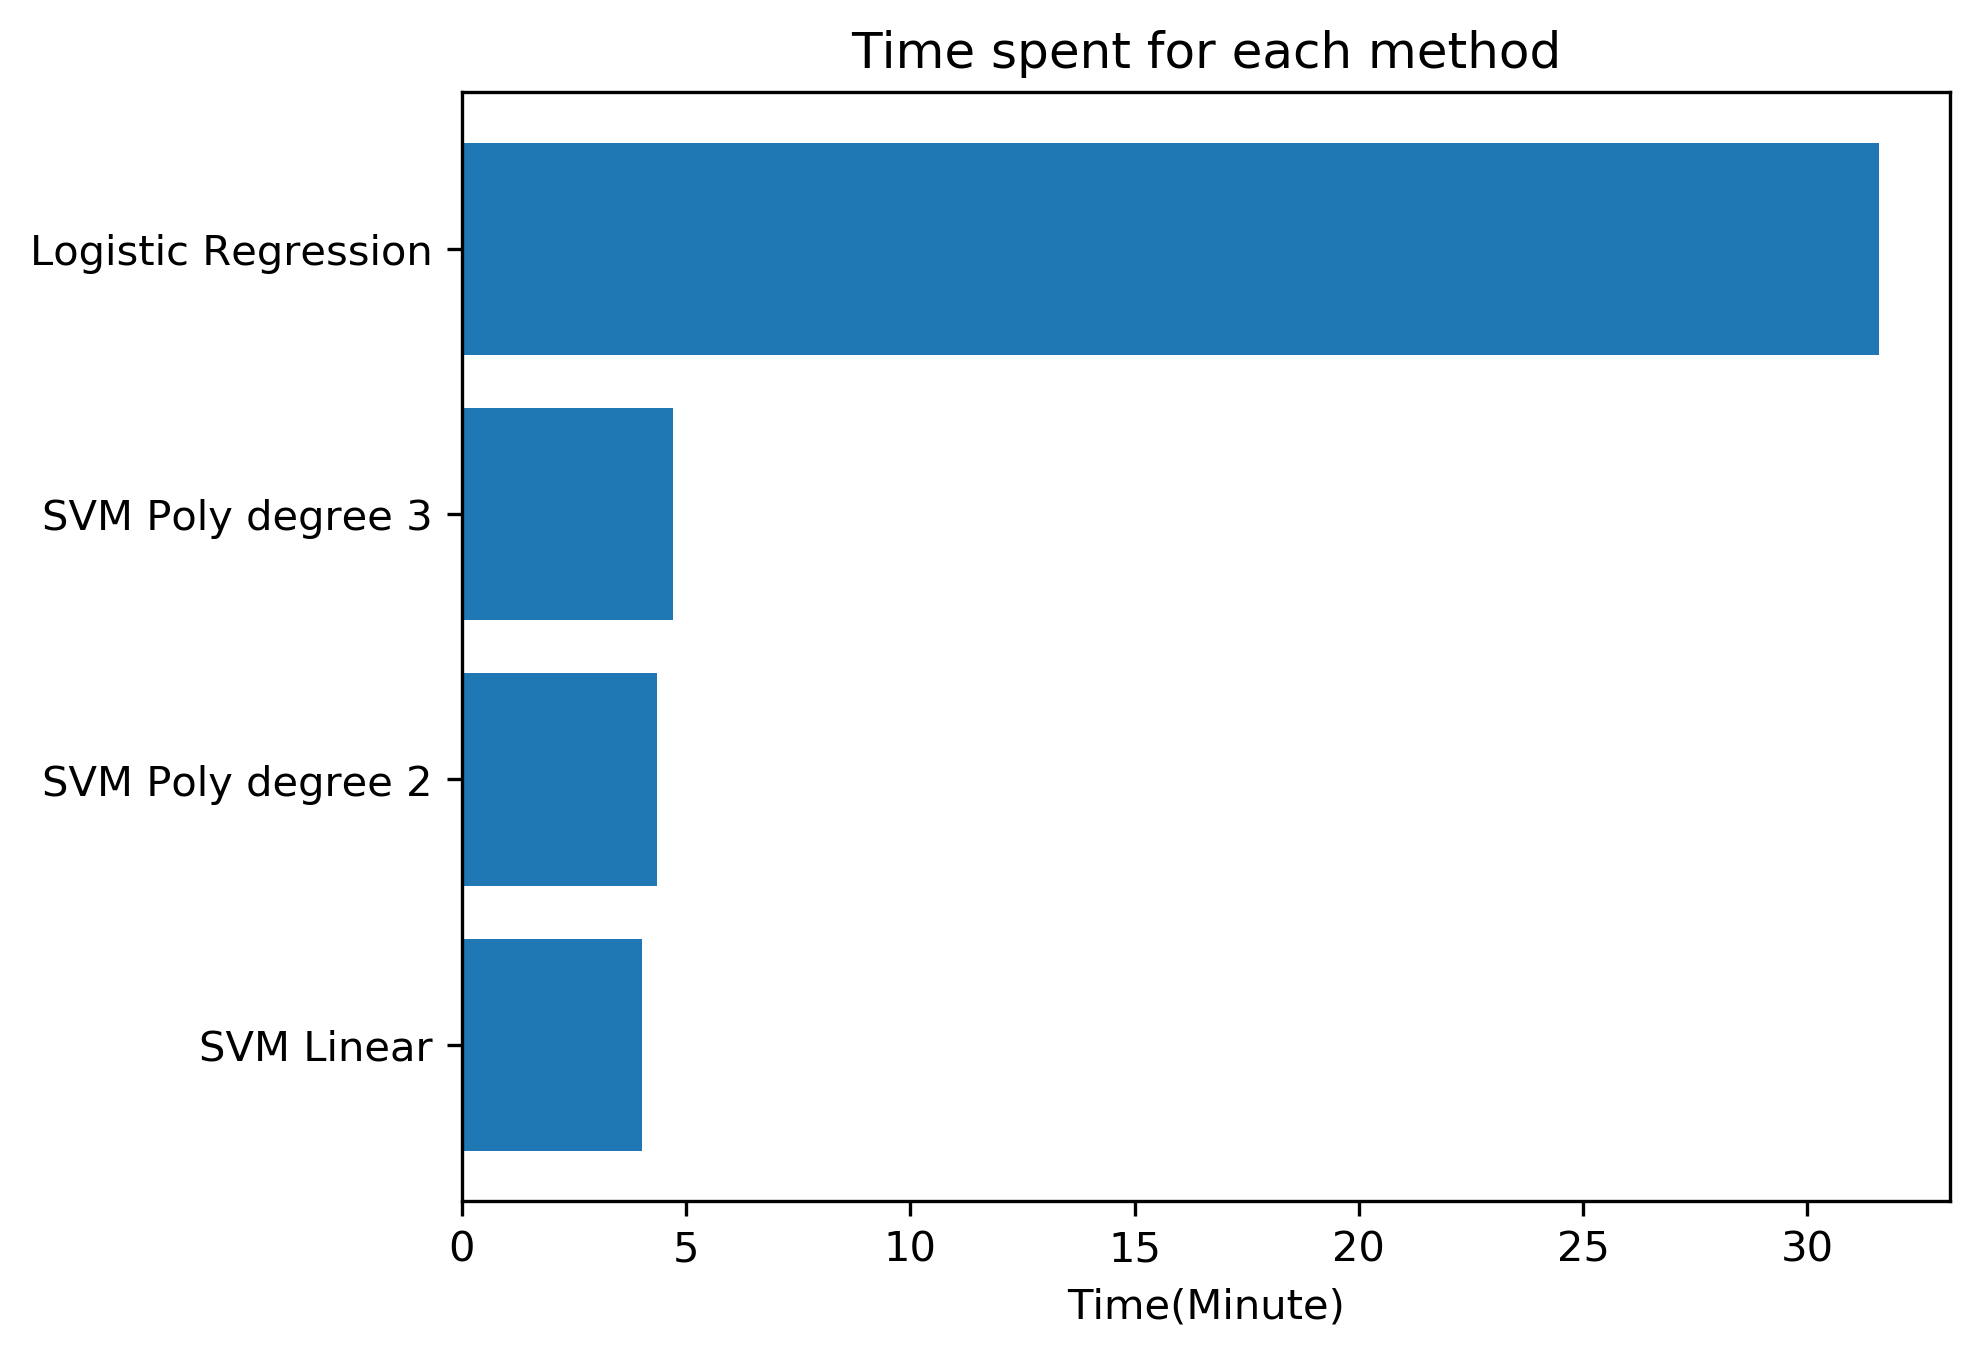

In [136]:
import numpy as np
import matplotlib.pyplot as plt
 
names = ['SVM Linear','SVM Poly degree 2','SVM Poly degree 3', 'Logistic Regression']
y_pos = np.arange(len(names))
counts = [time_linear, time_poly_d2, time_poly_d3, time_logres]

for i in range(4):
    counts[i] = counts[i]/60.0
 
plt.barh(y_pos, counts, align='center')
plt.yticks(y_pos, names)
plt.xlabel('Time(Minute)')
plt.title('Time spent for each method')
 
plt.show()

# 4. Neural Network

Açıklama

## 4.1 Introduction

## 4.2 History

In 1943 a paper was written by Warren S. McCulloch and Walter H. Pitts who were
neurophysiologist and mathematician respectively. This was the first emergence of the neurons that
could take part in computaional logic. The pictures below are from that paper.
[https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/History/history1.html]

## 4.3 Application on MNIST

Buraya kod gelecek

# FUNCTIONS

Functions, especially the long ones, used in this work are introduced here. They should be ran before the things above are activated. This is made because the definitions and contents of the functions are too long and they may be distractive.

## Maximum Misidentifiaction

In [26]:
def maximum_misidentification(matrix):
    max = 0
    max2 = 0
    max3 = 0
    for i in range(10):
        for j in range(10):
            if (matrix[i,j] > max and i != j):
                max = matrix[i,j]
                real = i
                predicted = j
    for k in range(10):
        for l in range(10):
            if (matrix[k,l] > max2 and k != l and (k != real and l != predicted)):
                max2 = matrix[k,l]
                real2 = k
                predicted2 = l
                
    for m in range(10):
        for n in range(10):
            if (matrix[m,n] > max3 and m != n and (m != real and n != predicted) and (m != real2 and n != predicted2)):
                max3 = matrix[m,n]
                real3 = m
                predicted3 = n
            
    max = max*100
    max = np.around(max, 3)
    
    print("Apart from the diagonal elements of the confusion matrix:")
    print("While predicting the integer", 
          real, 
          ",", 
          max, 
          "% of the times the algorithm misidentified it as", 
          predicted, 
          "and")
    
    max2 = max2*100
    max2 = np.around(max2, 3)
    print("while predicting the integer", 
          real2, 
          ",", 
          max2, 
          "% of the times the algorithm misidentified it as", 
          predicted2, 
          "and")
    
    max3 = max3*100
    max3 = np.around(max3, 3)
    print("while predicting the integer", 
          real3, 
          ",", 
          max3, 
          "% of the times the algorithm misidentified it as", 
          predicted3, 
          ".")

## Plot Confusion Matrix

In [25]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# REFERENCES

[1] https://en.wikipedia.org/wiki/MNIST_database

[2] http://yann.lecun.com/exdb/mnist/

[3] https://www.semanticscholar.org/paper/NIST-form-based-handprint-recognition-system-2.0)-Garris-Blue/3cb00eaa2b49771ee2b86771f64a7bdea4bd4bed

[4] The Origins of Logistic Regression, J.S. Cramer, Tinbergen Institute 2002